# Vehicle Dataset Classification with Fuzzy Rough Sets

This notebook demonstrates how to use the Eddy library (Fuzzy LEM2) for vehicle classification.

## Dataset Information
- **846 samples** of vehicle silhouettes
- **18 continuous features** (shape measurements)
- **4 classes**: van, saab, bus, opel

## What is Fuzzy LEM2?
LEM2 (Learning from Examples Module 2) is a rule induction algorithm based on rough set theory. The fuzzy extension handles continuous data by using fuzzy membership degrees.

## 1. Setup and Imports

In [21]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score,
    ConfusionMatrixDisplay
)

# Eddy library imports
from eddy.fuzzylem import FuzzyLEM2Classifier
import eddy.datasets as data

# Configure plotting
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

print("✅ Imports successful!")

✅ Imports successful!


## 2. Load and Explore the Dataset

In [22]:
# Load the vehicle dataset
(X, y), ds_name = data.vehicle()

print(f"Dataset: {ds_name}")
print(f"Shape: {X.shape}")
print(f"Samples: {X.shape[0]}")
print(f"Features: {X.shape[1]}")
print(f"Classes: {len(np.unique(y))}")

Dataset: vehicle
Shape: (846, 18)
Samples: 846
Features: 18
Classes: 4


In [23]:
# Feature names (from the CSV header)
feature_names = [
    'Compactness', 'Circularity', 'Distance_circularity', 'Radius_ratio',
    'Praxis_aspect_ratio', 'Max_length_aspect_ratio', 'Scatter_ratio',
    'Elongatedness', 'Praxis_rectangular', 'Length_rectangular',
    'Major_variance', 'Minor_variance', 'Gyration_radius',
    'Major_skewness', 'Minor_skewness', 'Minor_kurtosis',
    'Major_kurtosis', 'Hollows_ratio'
]

class_names = ['van', 'saab', 'bus', 'opel']

# Create a DataFrame for easier exploration
df = pd.DataFrame(X, columns=feature_names)
df['Class'] = y
df['Class_Name'] = df['Class'].map({0: 'van', 1: 'saab', 2: 'bus', 3: 'opel'})

print("\n📊 First few rows:")
df.head()


📊 First few rows:


,Compactness,Circularity,Distance_circularity,Radius_ratio,Praxis_aspect_ratio,Max_length_aspect_ratio,Scatter_ratio,Elongatedness,Praxis_rectangular,Length_rectangular,Major_variance,Minor_variance,Gyration_radius,Major_skewness,Minor_skewness,Minor_kurtosis,Major_kurtosis,Hollows_ratio,Class,Class_Name
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,0.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,0.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,1.0,saab
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,0.0,van
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,2.0,bus


## 3. Data Exploration and Visualization

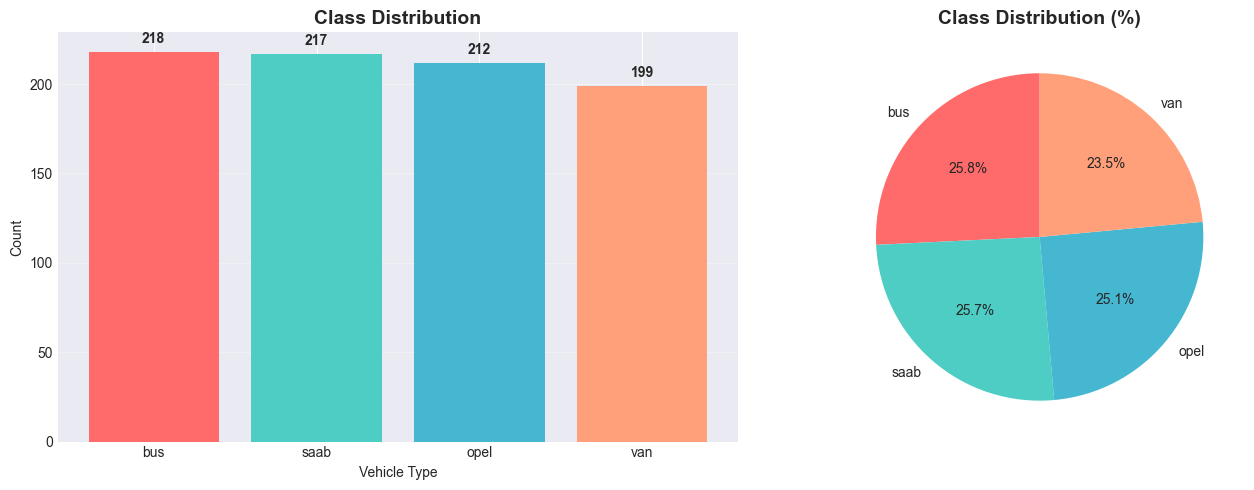


📈 Class Statistics:
      van: 199 samples ( 23.5%)
     saab: 217 samples ( 25.7%)
      bus: 218 samples ( 25.8%)
     opel: 212 samples ( 25.1%)


In [24]:
# Class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
class_counts = df['Class_Name'].value_counts()
axes[0].bar(class_counts.index, class_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
axes[0].set_title('Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Vehicle Type')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, (name, count) in enumerate(class_counts.items()):
    axes[0].text(i, count + 5, str(count), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%',
            colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'], startangle=90)
axes[1].set_title('Class Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📈 Class Statistics:")
for name in class_names:
    count = (df['Class_Name'] == name).sum()
    percentage = count / len(df) * 100
    print(f"   {name:>6s}: {count:3d} samples ({percentage:5.1f}%)")

In [25]:
# Feature statistics
print("\n📐 Feature Statistics:")
df[feature_names].describe()


📐 Feature Statistics:


,Compactness,Circularity,Distance_circularity,Radius_ratio,Praxis_aspect_ratio,Max_length_aspect_ratio,Scatter_ratio,Elongatedness,Praxis_rectangular,Length_rectangular,Major_variance,Minor_variance,Gyration_radius,Major_skewness,Minor_skewness,Minor_kurtosis,Major_kurtosis,Hollows_ratio
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


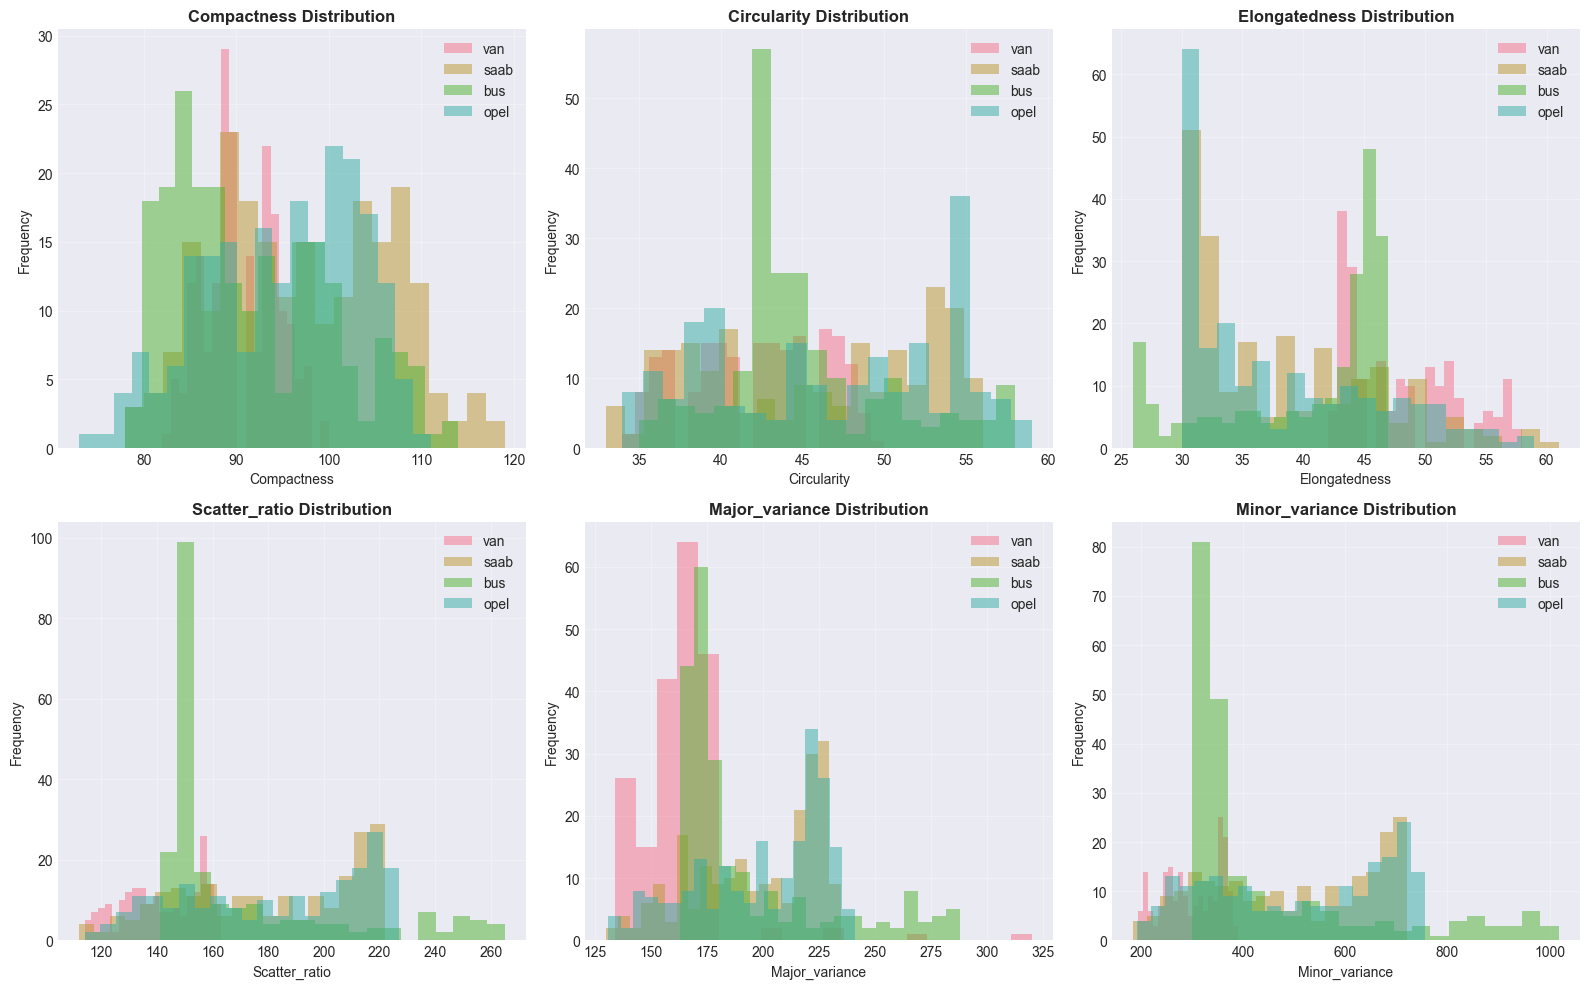

In [26]:
# Visualize some key features by class
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

features_to_plot = ['Compactness', 'Circularity', 'Elongatedness', 
                    'Scatter_ratio', 'Major_variance', 'Minor_variance']

for idx, feature in enumerate(features_to_plot):
    for class_name in class_names:
        data_subset = df[df['Class_Name'] == class_name][feature]
        axes[idx].hist(data_subset, alpha=0.5, label=class_name, bins=20)
    
    axes[idx].set_title(f'{feature} Distribution', fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

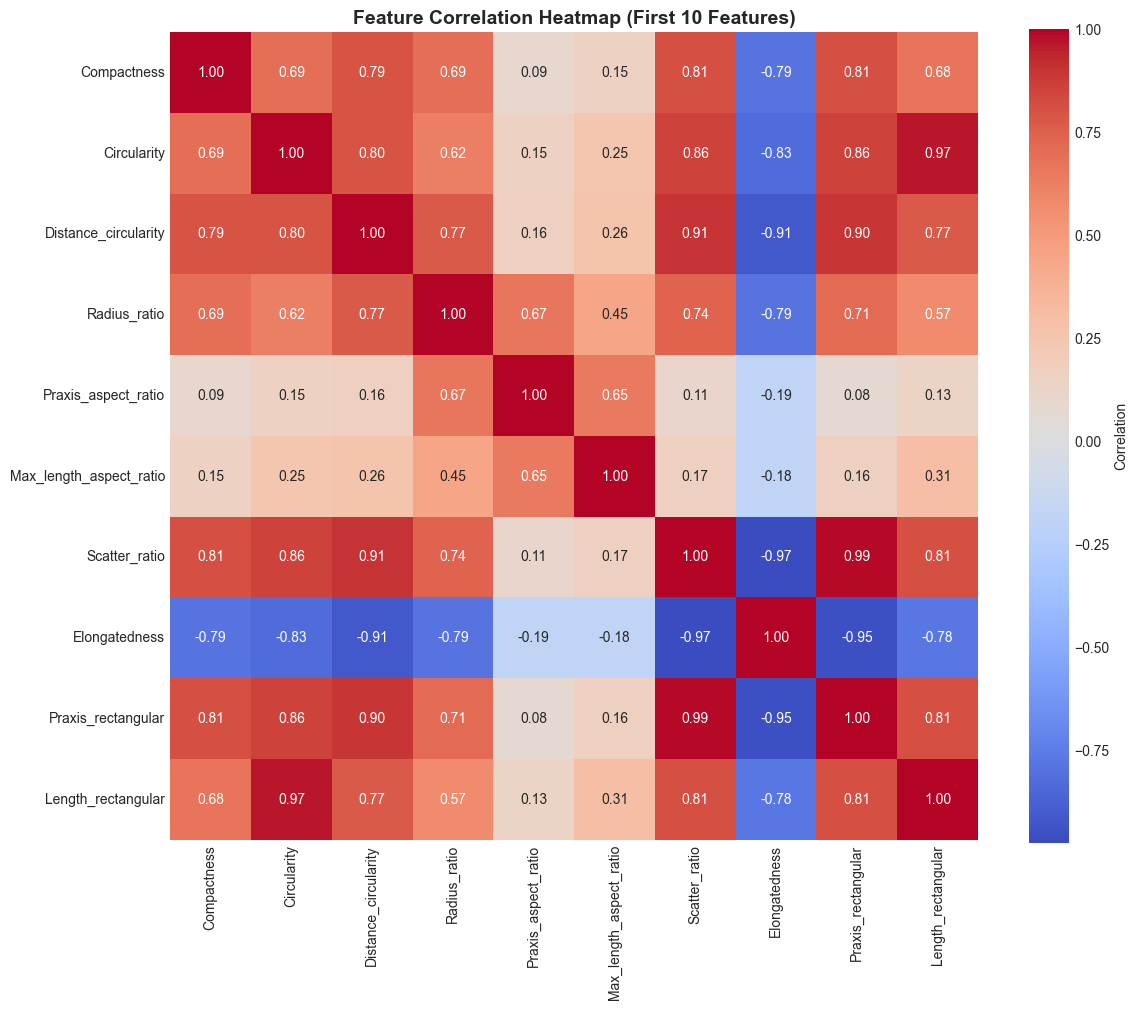

In [27]:
# Correlation heatmap (first 10 features for readability)
plt.figure(figsize=(12, 10))
correlation_matrix = df[feature_names[:10]].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, cbar_kws={'label': 'Correlation'})
plt.title('Feature Correlation Heatmap (First 10 Features)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 4. Data Preparation

In [28]:
# Split the data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"\nTraining class distribution:")
train_dist = pd.Series(y_train).value_counts().sort_index()
for class_idx, count in train_dist.items():
    print(f"   {class_names[int(class_idx)]}: {count} samples")

Training set: 592 samples
Testing set: 254 samples

Training class distribution:
   van: 139 samples
   saab: 152 samples
   bus: 153 samples
   opel: 148 samples


## 5. Train Fuzzy LEM2 Classifier

### Parameters Explanation:
- **alpha** (0.05): Dependency threshold - controls how strict the rules are
  - Lower values → stricter rules (fewer false positives)
  - Higher values → more lenient rules (better coverage)
  
- **beta** (0.2): Covering threshold - controls how precisely rules must cover the concept
  - Lower values → more precise covering required
  - Higher values → allows partial covering

In [29]:
# Initialize the classifier
clf = FuzzyLEM2Classifier(alpha=0.05, beta=0.2)

print("🤖 Training Fuzzy LEM2 Classifier...")
print("⏳ This may take a few minutes...\n")

# Train the model
clf.fit(X_train, y_train)

print("\n✅ Training complete!")

🤖 Training Fuzzy LEM2 Classifier...
⏳ This may take a few minutes...

{frozenset({(13, np.float64(119.0))})}
{frozenset({(13, np.float64(119.0))})}
{frozenset({(11, np.float64(904.0))})}
{frozenset({(11, np.float64(904.0))})}

✅ Training complete!


In [30]:
# Analyze the generated rules
print("\n📋 Generated Rules Summary:")
print("-" * 40)

total_rules = 0
for class_idx, class_name in enumerate(class_names):
    rules = clf.rules_[class_idx]
    num_rules = len(rules)
    total_rules += num_rules
    print(f"{class_name:>6s}: {num_rules:3d} rule complexes")

print("-" * 40)
print(f"Total:  {total_rules:3d} rule complexes")


📋 Generated Rules Summary:
----------------------------------------
   van:   1 rule complexes
  saab:   1 rule complexes
   bus:   1 rule complexes
  opel:   1 rule complexes
----------------------------------------
Total:    4 rule complexes


## 6. Make Predictions and Evaluate

In [31]:
# Make predictions on test set
print("🔮 Making predictions on test set...")
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"\n🎯 Overall Accuracy: {accuracy:.2%}")

🔮 Making predictions on test set...

🎯 Overall Accuracy: 28.74%


In [32]:
# Detailed classification report
print("\n" + "="*70)
print("📈 CLASSIFICATION REPORT")
print("="*70)
print()
print(classification_report(y_test, y_pred, target_names=class_names, digits=3))


📈 CLASSIFICATION REPORT

              precision    recall  f1-score   support

         van      0.431     0.733     0.543        60
        saab      0.000     0.000     0.000        65
         bus      0.191     0.446     0.267        65
        opel      0.000     0.000     0.000        64

    accuracy                          0.287       254
   macro avg      0.156     0.295     0.203       254
weighted avg      0.151     0.287     0.197       254



c:\Users\behan\Desktop\2IKM\uncertain knowledge managemnt\python-fuzzy-roughsets\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\behan\Desktop\2IKM\uncertain knowledge managemnt\python-fuzzy-roughsets\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\behan\Desktop\2IKM\uncertain knowledge managemnt\python-fuzzy-roughsets\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with 

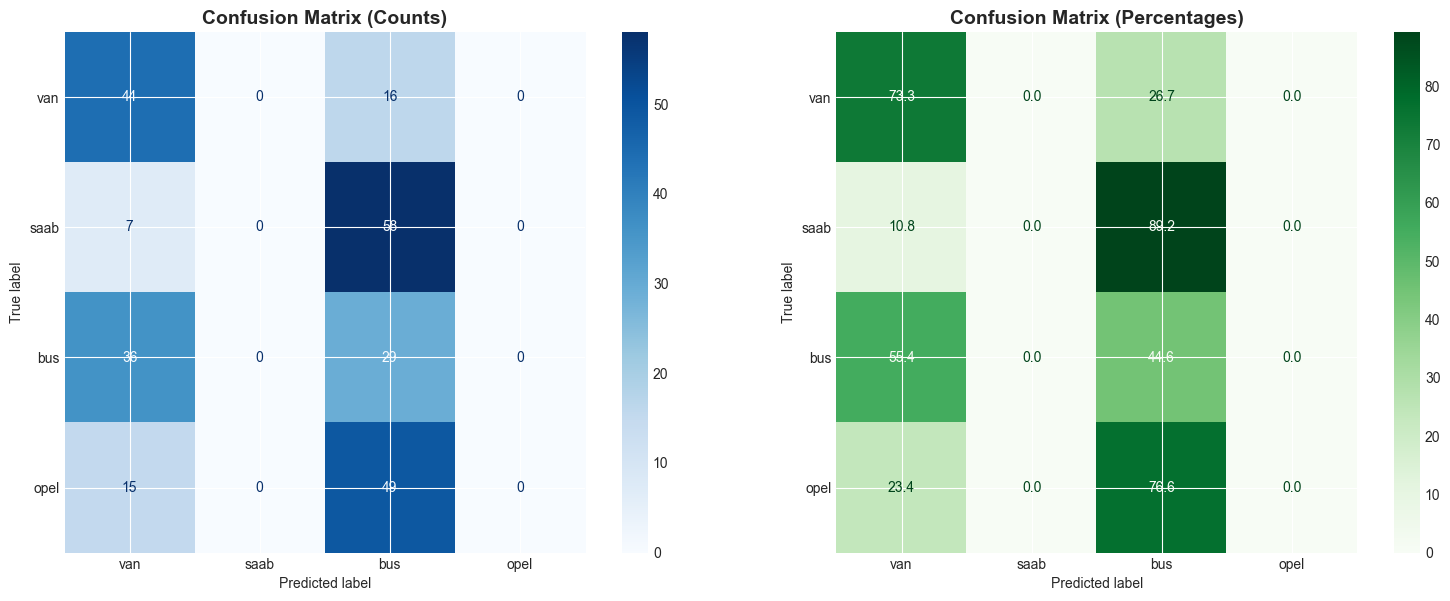

In [33]:
# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Confusion matrix - counts
cm = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp1.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Confusion Matrix (Counts)', fontsize=14, fontweight='bold')

# Confusion matrix - percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_percent, display_labels=class_names)
disp2.plot(ax=axes[1], cmap='Greens', values_format='.1f')
axes[1].set_title('Confusion Matrix (Percentages)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


📊 Per-Class Performance:
--------------------------------------------------
   van: Acc=73.33%, Prec=43.14%, Rec=73.33%, F1=0.543
  saab: Acc=0.00%, Prec=0.00%, Rec=0.00%, F1=0.000
   bus: Acc=44.62%, Prec=19.08%, Rec=44.62%, F1=0.267
  opel: Acc=0.00%, Prec=0.00%, Rec=0.00%, F1=0.000


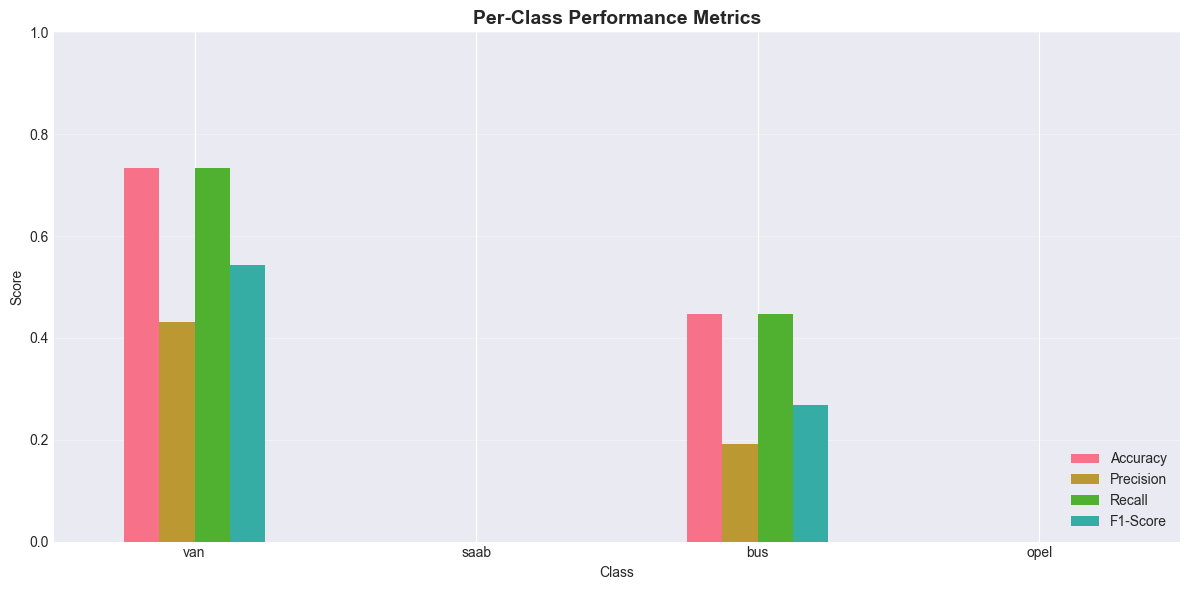

In [34]:
# Per-class performance
print("\n📊 Per-Class Performance:")
print("-" * 50)

cm = confusion_matrix(y_test, y_pred)
per_class_data = []

for i, name in enumerate(class_names):
    tp = cm[i, i]
    total = cm[i].sum()
    accuracy_class = tp / total if total > 0 else 0
    
    # Calculate precision and recall
    precision = tp / cm[:, i].sum() if cm[:, i].sum() > 0 else 0
    recall = accuracy_class
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    per_class_data.append({
        'Class': name,
        'Accuracy': accuracy_class,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })
    
    print(f"{name:>6s}: Acc={accuracy_class:.2%}, Prec={precision:.2%}, Rec={recall:.2%}, F1={f1:.3f}")

# Visualize per-class performance
perf_df = pd.DataFrame(per_class_data)
perf_df.set_index('Class')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(
    kind='bar', figsize=(12, 6), rot=0
)
plt.title('Per-Class Performance Metrics', fontsize=14, fontweight='bold')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Example Predictions

In [35]:
# Show some example predictions
print("\n🔍 Example Predictions (First 10 test samples):")
print("-" * 60)
print(f"{'Sample':>6} | {'True':>6} | {'Predicted':>10} | {'Correct':>7}")
print("-" * 60)

for i in range(min(10, len(y_test))):
    true_class = class_names[int(y_test[i])]
    pred_class = class_names[int(y_pred[i])]
    correct = "✓" if y_test[i] == y_pred[i] else "✗"
    print(f"{i+1:>6} | {true_class:>6} | {pred_class:>10} | {correct:>7}")


🔍 Example Predictions (First 10 test samples):
------------------------------------------------------------
Sample |   True |  Predicted | Correct
------------------------------------------------------------
     1 |   opel |        bus |       ✗
     2 |    van |        van |       ✓
     3 |    bus |        bus |       ✓
     4 |   saab |        bus |       ✗
     5 |   opel |        bus |       ✗
     6 |    van |        van |       ✓
     7 |   saab |        bus |       ✗
     8 |   opel |        bus |       ✗
     9 |    van |        van |       ✓
    10 |   saab |        van |       ✗


## 8. Parameter Tuning Experiment (Optional)

**Warning**: This section will take a long time to run! Feel free to skip it or reduce the parameter ranges.

In [36]:
# Test different parameter combinations
alpha_values = [0.01, 0.05, 0.1]
beta_values = [0.1, 0.2, 0.3]

results = []

print("🔬 Testing different parameter combinations...\n")
print("This will take several minutes...\n")

for alpha in alpha_values:
    for beta in beta_values:
        print(f"Testing alpha={alpha}, beta={beta}...", end=" ")
        
        try:
            clf_test = FuzzyLEM2Classifier(alpha=alpha, beta=beta)
            clf_test.fit(X_train, y_train)
            y_pred_test = clf_test.predict(X_test)
            acc = accuracy_score(y_test, y_pred_test)
            
            results.append({
                'alpha': alpha,
                'beta': beta,
                'accuracy': acc
            })
            
            print(f"Accuracy: {acc:.2%}")
        except Exception as e:
            print(f"Failed: {e}")

print("\n✅ Parameter tuning complete!")

🔬 Testing different parameter combinations...

This will take several minutes...

Testing alpha=0.01, beta=0.1... {frozenset({(13, np.float64(119.0))})}
{frozenset({(13, np.float64(119.0))})}
{frozenset({(11, np.float64(904.0))})}
{frozenset({(11, np.float64(904.0))})}
Accuracy: 28.74%
Testing alpha=0.01, beta=0.2... {frozenset({(13, np.float64(119.0))})}
{frozenset({(13, np.float64(119.0))})}
{frozenset({(11, np.float64(904.0))})}
{frozenset({(11, np.float64(904.0))})}
Accuracy: 28.74%
Testing alpha=0.01, beta=0.3... {frozenset({(13, np.float64(119.0))})}
{frozenset({(13, np.float64(119.0))})}
{frozenset({(11, np.float64(904.0))})}
{frozenset({(11, np.float64(904.0))})}
Accuracy: 28.74%
Testing alpha=0.05, beta=0.1... {frozenset({(13, np.float64(119.0))})}
{frozenset({(13, np.float64(119.0))})}
{frozenset({(11, np.float64(904.0))})}
{frozenset({(11, np.float64(904.0))})}
Accuracy: 28.74%
Testing alpha=0.05, beta=0.2... {frozenset({(13, np.float64(119.0))})}
{frozenset({(13, np.float64

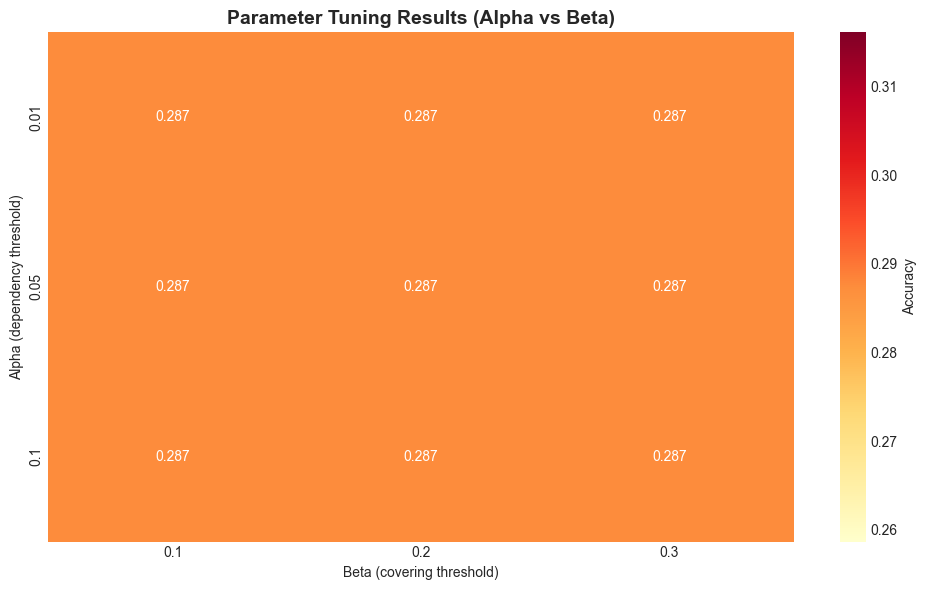


🏆 Best Parameters:
   Alpha: 0.01
   Beta: 0.1
   Accuracy: 28.74%


In [37]:
# Visualize parameter tuning results
if results:
    results_df = pd.DataFrame(results)
    
    # Create pivot table for heatmap
    pivot_table = results_df.pivot(index='alpha', columns='beta', values='accuracy')
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='YlOrRd', 
                cbar_kws={'label': 'Accuracy'})
    plt.title('Parameter Tuning Results (Alpha vs Beta)', fontsize=14, fontweight='bold')
    plt.xlabel('Beta (covering threshold)')
    plt.ylabel('Alpha (dependency threshold)')
    plt.tight_layout()
    plt.show()
    
    # Find best parameters
    best_result = results_df.loc[results_df['accuracy'].idxmax()]
    print(f"\n🏆 Best Parameters:")
    print(f"   Alpha: {best_result['alpha']}")
    print(f"   Beta: {best_result['beta']}")
    print(f"   Accuracy: {best_result['accuracy']:.2%}")

## 9. Comparison with Other Classifiers (Optional)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Train different classifiers
classifiers = {
    'Fuzzy LEM2': clf,
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

comparison_results = []

print("🔬 Comparing with other classifiers...\n")

for name, classifier in classifiers.items():
    if name != 'Fuzzy LEM2':
        print(f"Training {name}...", end=" ")
        classifier.fit(X_train, y_train)
        print("Done.")
    
    y_pred_comp = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred_comp)
    
    comparison_results.append({
        'Classifier': name,
        'Accuracy': acc
    })

print("\n✅ Comparison complete!")

🔬 Comparing with other classifiers...

Training Random Forest... Done.
Training SVM... Done.
Training K-Nearest Neighbors... Done.
Training Naive Bayes... Done.

✅ Comparison complete!


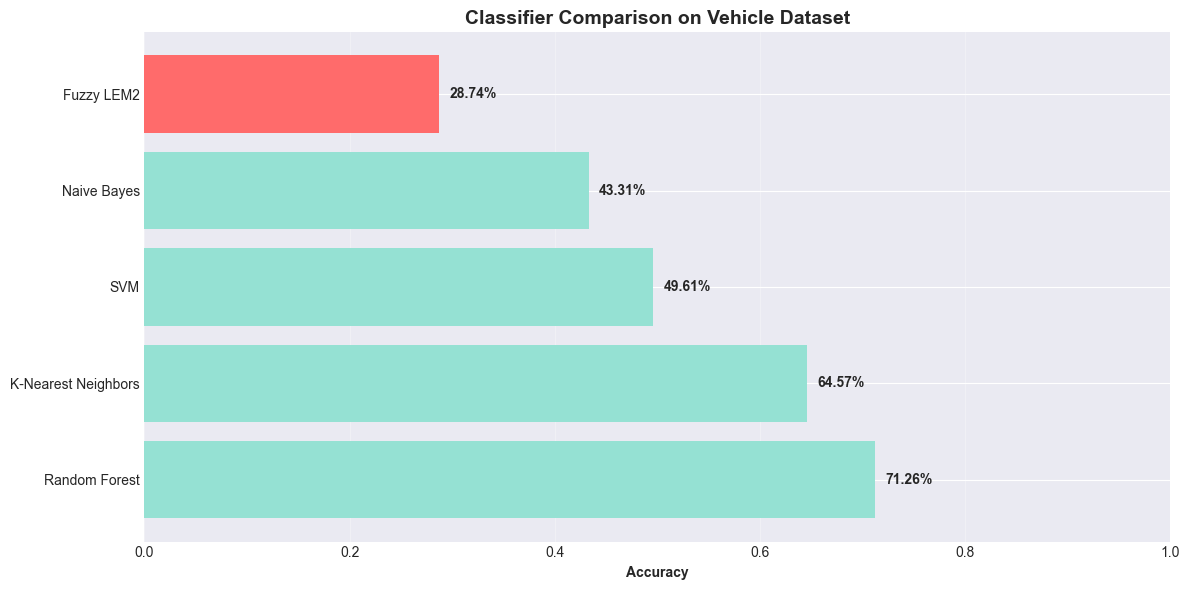


📊 Classifier Rankings:
         Classifier  Accuracy
      Random Forest  0.712598
K-Nearest Neighbors  0.645669
                SVM  0.496063
        Naive Bayes  0.433071
         Fuzzy LEM2  0.287402


In [39]:
# Visualize comparison
comp_df = pd.DataFrame(comparison_results).sort_values('Accuracy', ascending=False)

plt.figure(figsize=(12, 6))
colors = ['#FF6B6B' if x == 'Fuzzy LEM2' else '#95E1D3' for x in comp_df['Classifier']]
bars = plt.barh(comp_df['Classifier'], comp_df['Accuracy'], color=colors)

# Add value labels
for i, (bar, acc) in enumerate(zip(bars, comp_df['Accuracy'])):
    plt.text(acc + 0.01, i, f'{acc:.2%}', va='center', fontweight='bold')

plt.xlabel('Accuracy', fontweight='bold')
plt.title('Classifier Comparison on Vehicle Dataset', fontsize=14, fontweight='bold')
plt.xlim(0, 1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 Classifier Rankings:")
print(comp_df.to_string(index=False))

## 10. Summary and Conclusions

In [40]:
print("="*70)
print("📝 SUMMARY")
print("="*70)
print(f"\n✅ Successfully trained Fuzzy LEM2 classifier on vehicle dataset")
print(f"\n📊 Key Results:")
print(f"   • Dataset: {X.shape[0]} samples, {X.shape[1]} features, {len(class_names)} classes")
print(f"   • Test Accuracy: {accuracy:.2%}")
print(f"   • Total Rules Generated: {sum(len(clf.rules_[i]) for i in range(len(class_names)))}")
print(f"\n💡 Key Observations:")
print(f"   • Vehicle classification is challenging due to overlapping features")
print(f"   • Fuzzy LEM2 generates interpretable if-then rules")
print(f"   • Parameters (alpha, beta) significantly affect performance")
print("\n" + "="*70)

📝 SUMMARY

✅ Successfully trained Fuzzy LEM2 classifier on vehicle dataset

📊 Key Results:
   • Dataset: 846 samples, 18 features, 4 classes
   • Test Accuracy: 28.74%
   • Total Rules Generated: 4

💡 Key Observations:
   • Vehicle classification is challenging due to overlapping features
   • Fuzzy LEM2 generates interpretable if-then rules
   • Parameters (alpha, beta) significantly affect performance

